# D.C. Properties - Exploratory Data Analysis

This notebook analyzes the DC Properties dataset and answers some fundamental questions about the use case. The selected columns are:

 * **NUM_UNITS** - Number of Units
 * **ROOMS** - Number of Rooms
 * **BEDRM** - Number of Bedrooms
 * **BATHRM** - Number of Full Bathrooms
 * **HF_BATHRM** - Number of Half Bathrooms (no bathtub or shower)
 * **KITCHENS** - Number of kitchens
 * **STORIES** - Number of stories in primary dwelling
 * **HEAT** - Heating
 * **AC** - Cooling
 * **FIREPLACES** - Number of fireplaces
 * **ROOF** - Roof type
 * **EXTWALL** - Exterior wall
 * **AYB** - The earliest time the main portion of the building was built
 * **EYB** - The year an improvement was built more recent than actual year built
 * **SALEDATE** - Date of most recent sale
 * **CNDTN** - Condition
 * **GBA** - Gross building area in square feet
 * **LANDAREA** - Land area of property in square feet
 * **WARD** - Ward (District is divided into eight wards, each with approximately 75,000 residents)
 * **X** - The longitude
 * **Y** - The latitude
 * **PRICE** - Price of most recent sale

## Imports and Config setting

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
pd.set_option('display.max_columns', None)
sns.set(rc={'figure.figsize':(11.7,8.27)})

## Data loading

Define a series of parameters that will be used in the notebook

In [3]:
# Params
input_data_path = '2_dc_properties_processed_zipped.csv'

Load the data file and give a preview of it

In [4]:
data_df = pd.read_csv(input_data_path, low_memory=False, index_col=0, compression='zip')
data_df

,NUM_UNITS,ROOMS,BEDRM,BATHRM,HF_BATHRM,KITCHENS,STORIES,HEAT,AC,FIREPLACES,ROOF,EXTWALL,AYB,EYB,YR_SALE,CNDTN,GBA,LANDAREA,WARD,X,Y,PRICE
0,2.0,8,4,4,0,2.0,3.0,Warm Cool,Y,5,Metal- Sms,Common Brick,1910.0,1972,2003.0,3.0,2522.0,1680,2,-77.040429,38.914881,1095000.0
1,2.0,11,5,3,1,2.0,3.0,Warm Cool,Y,4,Built Up,Common Brick,1898.0,1972,2000.0,3.0,2567.0,1680,2,-77.040429,38.914881,NaN
2,2.0,9,5,3,1,2.0,3.0,Hot Water Rad,Y,4,Built Up,Common Brick,1910.0,1984,2016.0,4.0,2522.0,1680,2,-77.040429,38.914881,2100000.0
3,2.0,8,5,3,1,2.0,3.0,Hot Water Rad,Y,3,Built Up,Common Brick,1900.0,1984,2006.0,3.0,2484.0,1680,2,-77.040429,38.914881,1602000.0
4,1.0,11,3,2,1,1.0,3.0,Warm Cool,Y,0,Neopren,Common Brick,1913.0,1985,NaN,3.0,5255.0,2032,2,-77.040429,38.914881,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106153,2.0,8,4,2,0,2.0,2.0,Forced Air,N,0,Built Up,Common Brick,1953.0,1962,NaN,2.0,1600.0,6337,8,-77.006347,38.821799,NaN
106154,2.0,10,5,2,0,2.0,2.0,Forced Air,N,0,Built Up,Common Brick,1953.0,1962,2012.0,2.0,1600.0,5348,8,-77.006347,38.821799,100000.0
106155,2.0,10,4,2,0,2.0,2.0,Forced Air,N,0,Built Up,Common Brick,1953.0,1953,2009.0,2.0,1600.0,3466,8,-77.006347,38.821799,NaN
106156,2.0,10,4,2,0,2.0,2.0,Forced Air,N,0,Comp Shingle,Common Brick,1953.0,1971,2017.0,3.0,1600.0,3046,8,-77.006347,38.821799,215000.0


## Exploratory Data Analysis

The data contains the historical sale records of properties in DC. There are more than 100k rows and 22 selected columns. 

There are a series of questions we would like to answer about out dataset. Let's get started!

First, for those that are not familiar this is what the wards in DC look like.  

In [5]:
from IPython.display import Image
from IPython.core.display import HTML 

Image(url= "https://images.squarespace-cdn.com/content/v1/56e6cad12fe13155d5243018/1467308071684-I84GAR58UWK3D180PL74/image-asset.jpeg?format=300w", width=300, height=300)

First, how many wards are there considered in the dataset?. What is the distribution of properties sold in each of them?

<AxesSubplot:xlabel='WARD', ylabel='COUNT'>

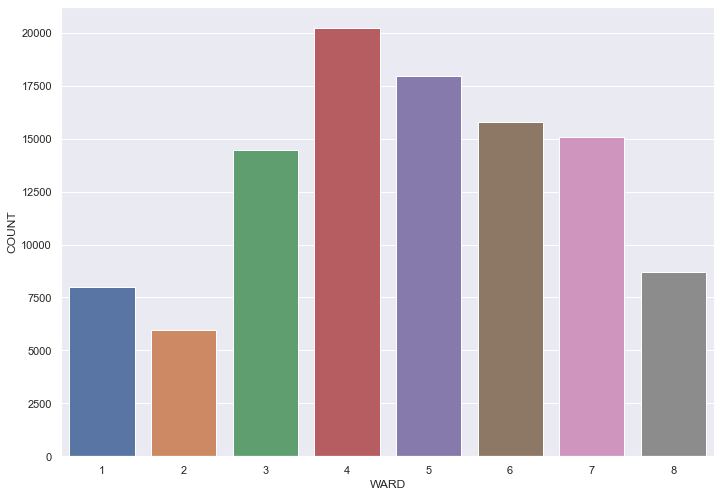

In [6]:
# Plot a bar chart with the number of properties sold in each ward

count_df = data_df.groupby('WARD')['WARD'].count().reset_index(name='COUNT')
sns.barplot(data=count_df, x="WARD", y="COUNT")


This gives us an idea of what area is 'hotter' in terms of number of properties sold, however, we would like to identify what are the most aforable areas and the most expensive ones.

<AxesSubplot:xlabel='WARD', ylabel='PRICE'>

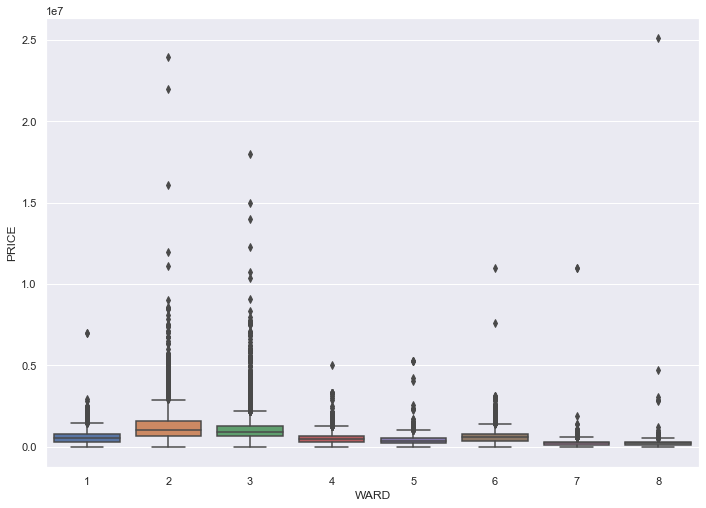

In [7]:
# Plot a chart that would be representative of the prices in each ward
sns.boxplot(data=data_df, x="WARD", y="PRICE")


If we compare the highest property sold in each of the wards, against their average we can see there are some clear outliers. Let's go further into the prices of the properties being sold. 

How would we take a glimpse on the price variable over time? 

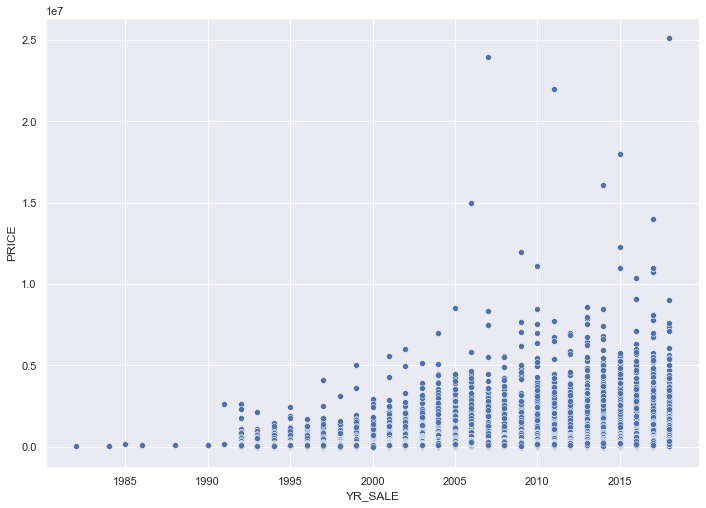

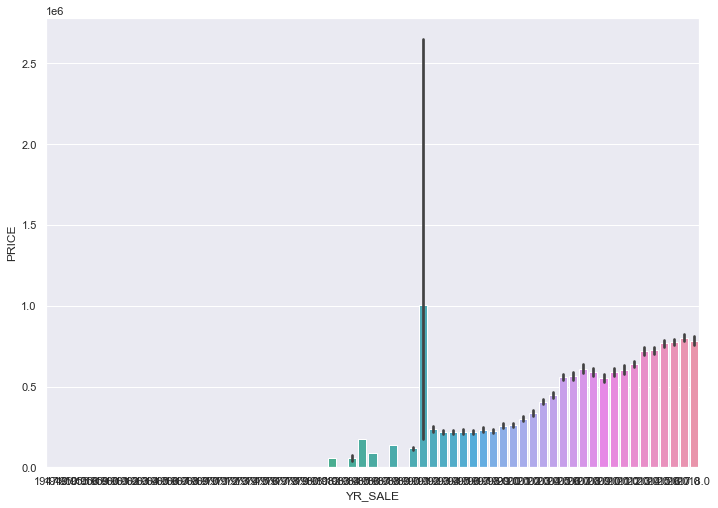

In [8]:
# Plot a chart that would give us a general idea on the prices over time
sns.scatterplot(data=data_df, x="YR_SALE", y="PRICE")
plt.show()

sns.barplot(data=data_df, x="YR_SALE", y="PRICE")
plt.show()

In [9]:
# You might want to describe the PRICE variable
data_df.PRICE.describe()

count    5.766700e+04
mean     5.794707e+05
std      5.987995e+05
min      1.000000e+00
25%      2.400000e+05
50%      4.400000e+05
75%      7.500000e+05
max      2.510000e+07
Name: PRICE, dtype: float64

Let's remove the properties sold before the 1990 and ignore the ones with an astronomical price. 

Now, it might be easier to look at how the price per ward looks like. 

In [10]:
# Filter data_df by YR_SALE and PRICE
data_df = data_df[(data_df.YR_SALE >= 1990) & (data_df.PRICE < 15000000)]
data_df

,NUM_UNITS,ROOMS,BEDRM,BATHRM,HF_BATHRM,KITCHENS,STORIES,HEAT,AC,FIREPLACES,ROOF,EXTWALL,AYB,EYB,YR_SALE,CNDTN,GBA,LANDAREA,WARD,X,Y,PRICE
0,2.0,8,4,4,0,2.0,3.0,Warm Cool,Y,5,Metal- Sms,Common Brick,1910.0,1972,2003.0,3.0,2522.0,1680,2,-77.040429,38.914881,1095000.0
2,2.0,9,5,3,1,2.0,3.0,Hot Water Rad,Y,4,Built Up,Common Brick,1910.0,1984,2016.0,4.0,2522.0,1680,2,-77.040429,38.914881,2100000.0
3,2.0,8,5,3,1,2.0,3.0,Hot Water Rad,Y,3,Built Up,Common Brick,1900.0,1984,2006.0,3.0,2484.0,1680,2,-77.040429,38.914881,1602000.0
5,1.0,10,5,3,2,1.0,4.0,Hot Water Rad,Y,4,Built Up,Common Brick,1913.0,1972,2010.0,3.0,5344.0,2196,2,-77.040429,38.914881,1950000.0
7,2.0,8,4,3,1,2.0,3.0,Hot Water Rad,Y,1,Metal- Sms,Common Brick,1906.0,1972,2011.0,2.0,2401.0,1627,2,-77.040429,38.914881,1050000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106149,2.0,10,4,2,0,2.0,2.0,Forced Air,N,0,Comp Shingle,Common Brick,1953.0,1962,2004.0,2.0,1600.0,5837,8,-77.006347,38.821799,95000.0
106150,2.0,10,4,2,0,2.0,2.0,Forced Air,Y,0,Built Up,Common Brick,1953.0,1971,2016.0,4.0,1600.0,5302,8,-77.006347,38.821799,185000.0
106154,2.0,10,5,2,0,2.0,2.0,Forced Air,N,0,Built Up,Common Brick,1953.0,1962,2012.0,2.0,1600.0,5348,8,-77.006347,38.821799,100000.0
106156,2.0,10,4,2,0,2.0,2.0,Forced Air,N,0,Comp Shingle,Common Brick,1953.0,1971,2017.0,3.0,1600.0,3046,8,-77.006347,38.821799,215000.0


<AxesSubplot:xlabel='WARD', ylabel='PRICE'>

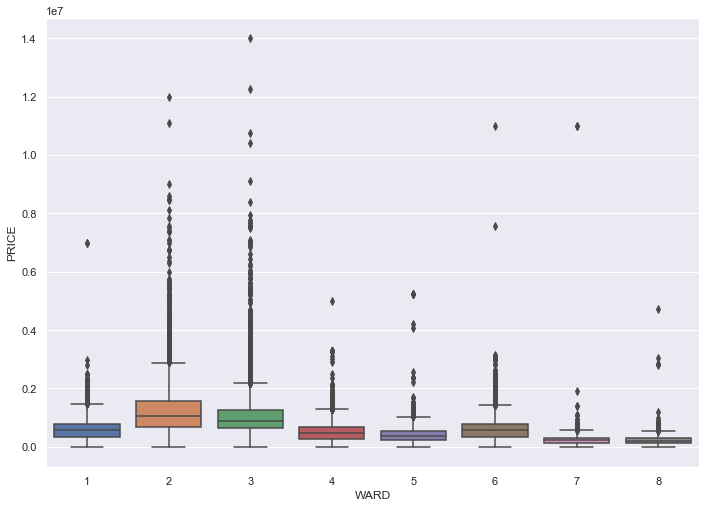

In [11]:
# Plot again the price per ward
sns.boxplot(data=data_df, x="WARD", y="PRICE")


It seems like location is a really important factor for the price. We would like to know what is more important, being NORTH/SOUTH or WEST/EAST of downtown.

<AxesSubplot:>

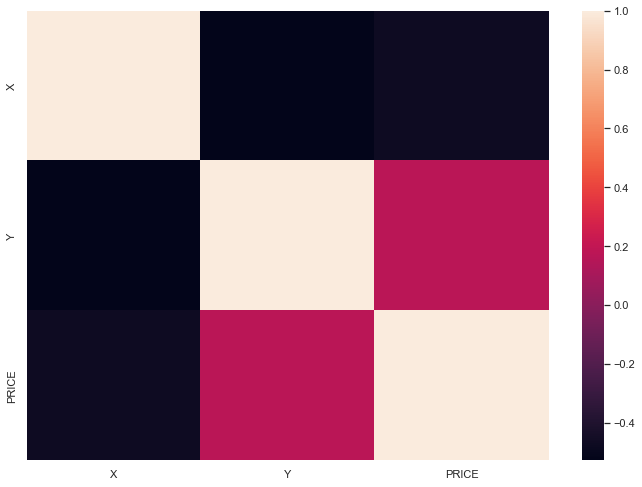

In [12]:
# Look at the correlation between X, Y, and PRICE
sns.heatmap(data_df[['X', 'Y', 'PRICE']].corr())


Now that we have a clear picture of the impact of the location in the price. We would like to know what is more important for the price in a property between the number of kitchens, bathrooms, bedrooms, and total number of rooms.

In [13]:
data_df

,NUM_UNITS,ROOMS,BEDRM,BATHRM,HF_BATHRM,KITCHENS,STORIES,HEAT,AC,FIREPLACES,ROOF,EXTWALL,AYB,EYB,YR_SALE,CNDTN,GBA,LANDAREA,WARD,X,Y,PRICE
0,2.0,8,4,4,0,2.0,3.0,Warm Cool,Y,5,Metal- Sms,Common Brick,1910.0,1972,2003.0,3.0,2522.0,1680,2,-77.040429,38.914881,1095000.0
2,2.0,9,5,3,1,2.0,3.0,Hot Water Rad,Y,4,Built Up,Common Brick,1910.0,1984,2016.0,4.0,2522.0,1680,2,-77.040429,38.914881,2100000.0
3,2.0,8,5,3,1,2.0,3.0,Hot Water Rad,Y,3,Built Up,Common Brick,1900.0,1984,2006.0,3.0,2484.0,1680,2,-77.040429,38.914881,1602000.0
5,1.0,10,5,3,2,1.0,4.0,Hot Water Rad,Y,4,Built Up,Common Brick,1913.0,1972,2010.0,3.0,5344.0,2196,2,-77.040429,38.914881,1950000.0
7,2.0,8,4,3,1,2.0,3.0,Hot Water Rad,Y,1,Metal- Sms,Common Brick,1906.0,1972,2011.0,2.0,2401.0,1627,2,-77.040429,38.914881,1050000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106149,2.0,10,4,2,0,2.0,2.0,Forced Air,N,0,Comp Shingle,Common Brick,1953.0,1962,2004.0,2.0,1600.0,5837,8,-77.006347,38.821799,95000.0
106150,2.0,10,4,2,0,2.0,2.0,Forced Air,Y,0,Built Up,Common Brick,1953.0,1971,2016.0,4.0,1600.0,5302,8,-77.006347,38.821799,185000.0
106154,2.0,10,5,2,0,2.0,2.0,Forced Air,N,0,Built Up,Common Brick,1953.0,1962,2012.0,2.0,1600.0,5348,8,-77.006347,38.821799,100000.0
106156,2.0,10,4,2,0,2.0,2.0,Forced Air,N,0,Comp Shingle,Common Brick,1953.0,1971,2017.0,3.0,1600.0,3046,8,-77.006347,38.821799,215000.0


<AxesSubplot:xlabel='ROOMS', ylabel='PRICE'>

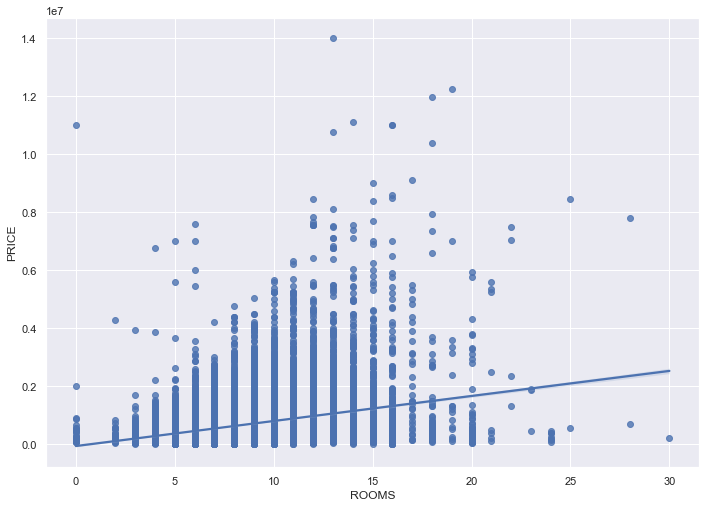

In [14]:
# Look at ROOMS against PRICE
sns.regplot(data=data_df, x='ROOMS', y='PRICE')

<AxesSubplot:xlabel='KITCHENS', ylabel='PRICE'>

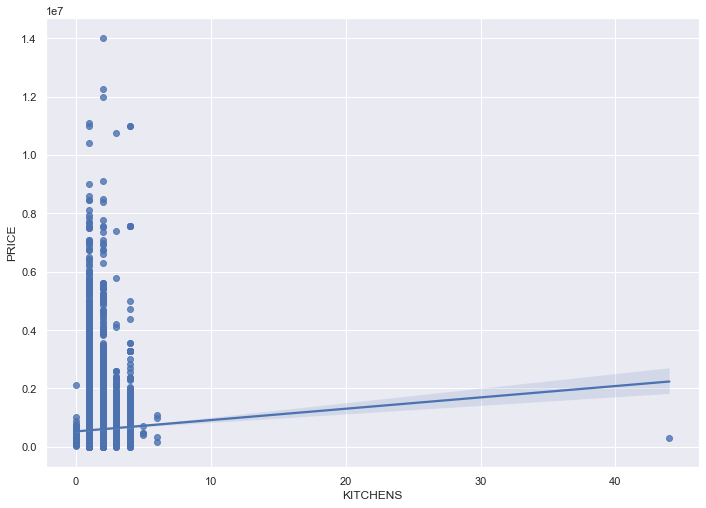

In [15]:
# Look at KITCHENS against PRICE
sns.regplot(data=data_df, x='KITCHENS', y='PRICE')

<AxesSubplot:xlabel='BEDRM', ylabel='PRICE'>

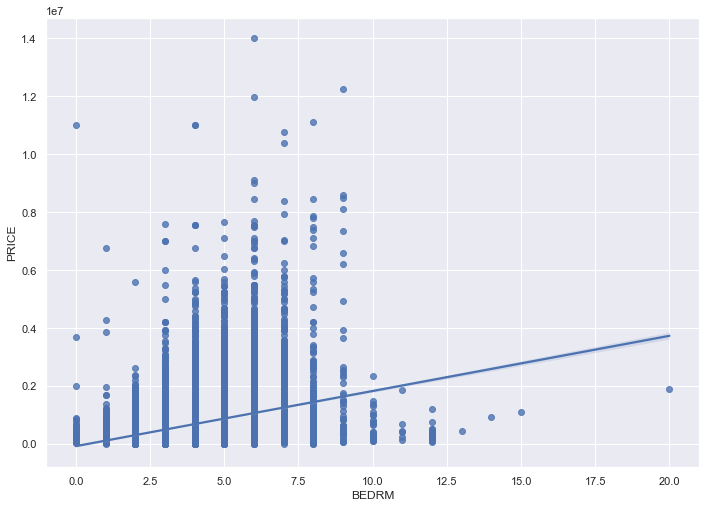

In [16]:
# Look at BEDRM against PRICE
sns.regplot(data=data_df, x='BEDRM', y='PRICE')

<AxesSubplot:xlabel='BATHRM', ylabel='PRICE'>

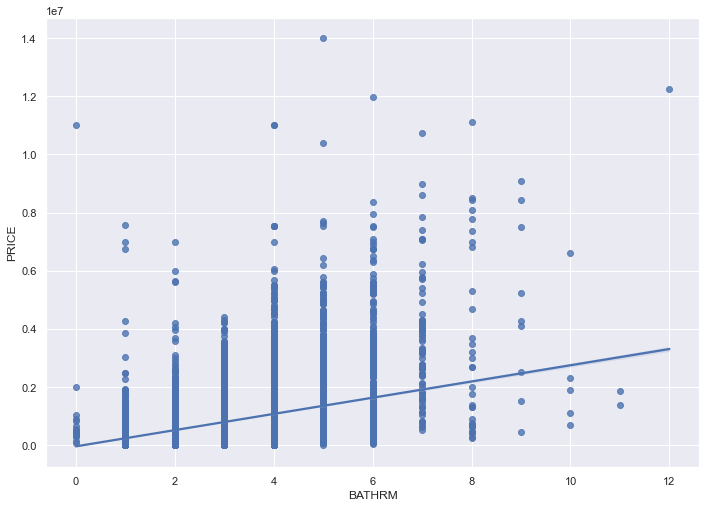

In [17]:
# Look at BATHRM against PRICE
sns.regplot(data=data_df, x='BATHRM', y='PRICE')

<AxesSubplot:>

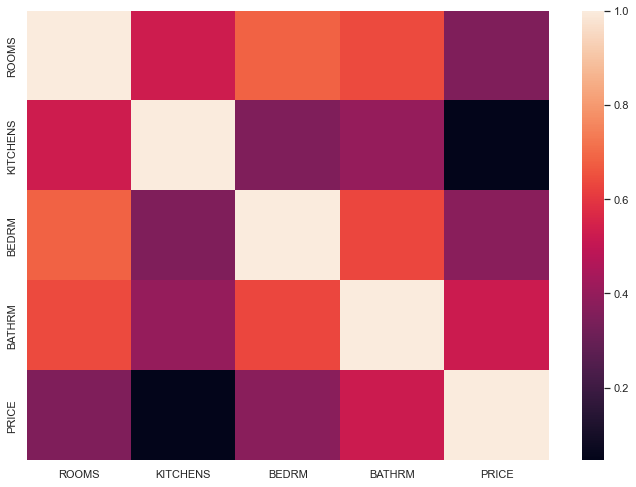

In [18]:
# Any other way to look at it?
sns.heatmap(data_df[['ROOMS', 'KITCHENS', 'BEDRM', 'BATHRM', 'PRICE']].corr())

Now we have a good idea of which locations have a higher impact on the price, and what is one of the most important features to determine the price on a property. Well done!